# 7CS034 Data Science Group 15 Barabasi-Albert Model implementation

### Installing the NetworkX and Matplotlib libraries 

In [61]:
#pip install networkx
#pip install matplotlib
#pip install numpy

### Importing the Networkx and Matplotlib libraries

In [62]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

### Assign network parameters (m>=1 and m < n)

In [63]:
n = 120
m = 12

Where,
- n is the Number of nodes which is an integer value
- m is the Number of edges to attach from a new node to existing nodes

### Variables to be used

In [64]:
# Stores the number of nodes
n_row = n
# Stores the number of edges
n_edges = m
# initialize graph
G = nx.Graph()
G2 = nx.Graph()

### Barabasi Albert Model (Growth Phase + Preferential Attachment)

In [65]:
def barabasi_albert_graph(n, m, seed=None):
    # Add m initial nodes (m0 in barabasi-speak)
    G=empty_graph(m)
    G.name="barabasi_albert_graph(%s,%s)"%(n,m)
    # Target nodes for new edges
    targets=list(range(m))
    # List of existing nodes, with nodes repeated once for each adjacent edge
    repeated_nodes=[]
    # Start adding the other n-m nodes. The first node is m.
    source=m
    while source<n:
        # Add edges to m nodes from the source.
        G.add_edges_from(zip(*m,targets))
        # Add one node to the list for each new edge just created.
        repeated_nodes.extend(targets)
        # And the new node "source" has m edges to add to the list.
        repeated_nodes.extend(*m)
        # Now choose m unique nodes from the existing nodes
        # Pick uniformly from repeated_nodes (preferential attachment)
        targets = _random_subset(repeated_nodes,m)
        source += 1
    return G

### Create Barabasi-Albert scale free graph

In [66]:
# Create the network graph
G= nx.barabasi_albert_graph(n,m)
# Get all the node positions of the graph
node_pos = nx.spring_layout(G) 

### Network plots

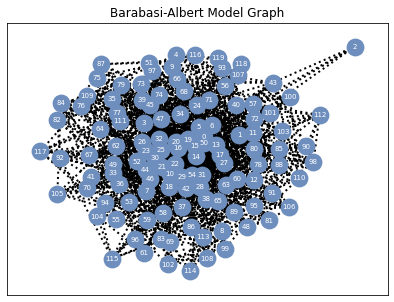

In [67]:
fig1 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1,2,1)
plt.title('Barabasi-Albert Model Graph')
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=7, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
fig1.savefig("Network_plot_n" + str(n_row) + "_m" + str(m) + ".png")

## Topological Properties

### Degree of Distribution for each Node in the Network

<Figure size 432x288 with 0 Axes>

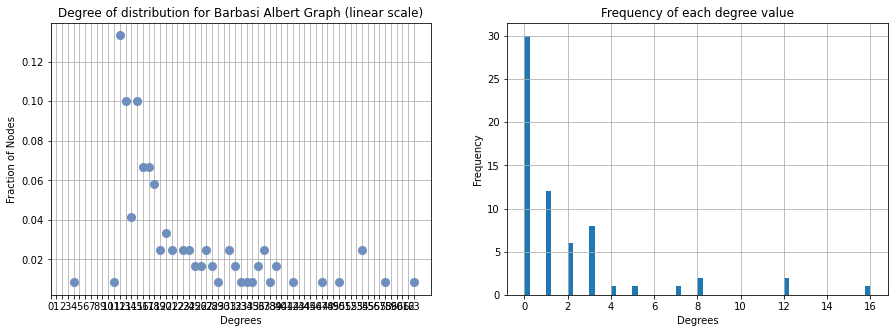

In [68]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
# Create a dictionary containing all the nodes and its edge connection
degrees = dict(G.degree())
# To get the degree of distribution values
degree_values = sorted(set(degrees.values()))
# Get the number of unique connections made in the Network
for i in range(len(degree_values)):
    unique_connections = list(degrees.values()).count(degree_values[i]) 
    #print('Degree', degree_values[i], ': has', unique_connections, 'portion of Nodes in the Network.', '\n' )
    
node_portion = [list(degrees.values()).count(i)/float(nodes) for i in degree_values]
#print('Fraction of Nodes:', node_portion, '\n')
plt.clf()
fig6 = plt.figure(figsize=(15, 5))
plt.subplot(1,2,1)
# Plot the graph
plt.title('Degree of distribution for Barbasi Albert Graph (linear scale)')
plt.plot(degree_values, node_portion, linewidth=0, color='#6E8EBD', marker= 'o', markersize = 8)
plt.ylabel('Fraction of Nodes')
plt.xlabel('Degrees')
plt.xticks(np.arange(0, degree_values[len(degree_values)-1] + 1, 1))
plt.grid()
# Plot the frequency of each degree value
d1 = nx.degree_histogram(G)
plt.subplot(1,2,2)
plt.title('Frequency of each degree value')
plt.hist(d1, bins=len(d1))
plt.xlabel('Degrees')
plt.ylabel('Frequency')
plt.grid()
plt.show()
fig6.savefig("DegreeDist_n" + str(n_row) + "_m" + str(m) + ".png")
#print('Frequency:', d1)

### Clustering Coefficient

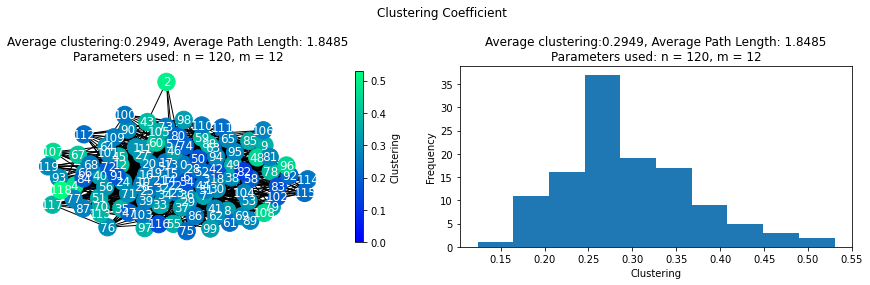

In [69]:
from matplotlib.cm import ScalarMappable

GC = G.subgraph(max(nx.connected_components(G)))
lcc = nx.clustering(GC)

cmap = plt.get_cmap('winter')
norm = plt.Normalize(0, max(lcc.values()))
node_colors = [cmap(norm(lcc[node])) for node in GC.nodes]

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 4))
nx.draw_spring(GC, node_color=node_colors, font_color='w', with_labels=True, ax=ax1)
fig.colorbar(ScalarMappable(cmap=cmap, norm=norm), label='Clustering', shrink=0.95, ax=ax1)
ax1.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))

ax2.hist(lcc.values(), bins=10)
ax2.set_xlabel('Clustering')
ax2.set_ylabel('Frequency')
ax2.set_title('Average clustering:' + str(round(nx.average_clustering(G), 4)) + ', ' 
              + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n'
              + 'Parameters used: n = ' + str(n_row) + ', m = ' + str(n_edges))
fig.suptitle('Clustering Coefficient')
plt.tight_layout()
plt.show()
fig.savefig("Clustering_plot_n" + str(n_row) + "_m" + str(m) + ".png")

### Computting for the Shortest Path between two nodes

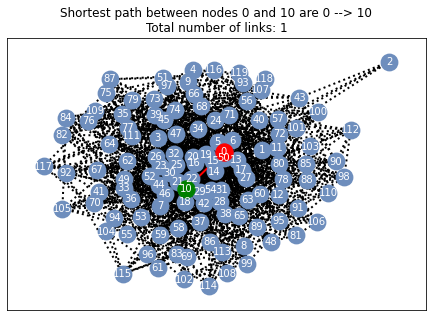

In [70]:
# https://stackoverflow.com/questions/57683321/edge-attributes-of-shortest-path-using-networkx
#Enter start node
st = 0 
#Enter end node
end = 10
# Gets the shortest between two nodes
path = nx.shortest_path(G)   
# Get a list of all the edges in the graph
path_edges = [list(u) for u in G.edges(data=False)]
# Creates the new edges list
n_edges = []
# Shortest path nodes
s_path = path[st][end]
# Convert shortest path list to string seperating each value with #
new_string = '#'.join(str(x) for x in s_path)
new_val = new_string
new_val2 = new_string[::-1]
# Get all the edge list between nodes
for i in range(len(path_edges)):
    n_path = path_edges[i]
    # Convert graph edges list to string seperating each value with #
    n_string = '#'.join(str(x) for x in n_path)
    # Check if the graph edges value is equal to shortest path values
    if  any(n_string.split('#')[1] == c for c in new_val.split('#')): 
        if any(n_string.split('#')[0] == c for c in new_val.split('#')):
            n_edges.append(n_path)

# Check if number of edges > 0
if len(n_edges) > 0:
    fig5 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=[st], node_color="r")
    nx.draw_networkx_nodes(G,node_pos, nodelist=[end], node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = n_edges, width=2.0, edge_color='r')
    # Check if the nodes is greater that 2
    if len(path[st][end]) > 0:
        plt.title('Shortest path between nodes ' + str(st) + ' and ' + str(end) 
                  + ' are ' + ' --> '.join(str(e) for e in (path[st][end])) 
                  + '\n' + 'Total number of links: ' + str(len(n_edges)))
    else:
        plt.title('Shortest path between nodes: No path found!' + '\n' + 'Total number of links: ' + str(len(n_edges)))
    fig5.savefig(str(st) + 's_' + str(end) +"e_ShortestPath_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the network size

In [71]:
print('Number of nodes in the graph', nx.number_of_nodes(G))

Number of nodes in the graph 120


### Finding number of edges in the graph

In [72]:
print('Number of edges in the graph', nx.number_of_edges(G))

Number of edges in the graph 1296


## Other network properties

### Removing a Node from the network (Betweenness)

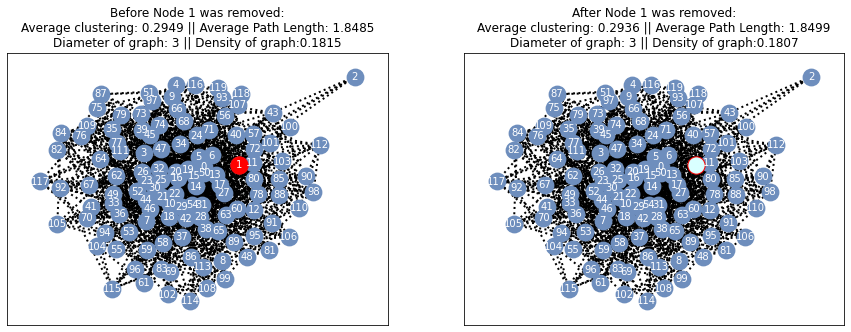

In [73]:
G2 = G
# Enter node id to be removed
node_id = 1

fig2 = plt.figure(figsize=(15, 5))
plt.clf()
plt.subplot(1, 2, 1)
plt.title('Before Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[node_id], node_color="r")
before = list(G.edges)
G2.remove_node(node_id)
after = list(G2.edges)
plt.subplot(1, 2, 2)
plt.title('After Node ' + str(node_id) + ' was removed:' + '\n' 
          + 'Average clustering: ' + str(round(nx.average_clustering(G2), 4)) + ' || ' 
          + 'Average Path Length: ' + str(round(nx.average_shortest_path_length(G2), 4)) + '\n' 
          + 'Diameter of graph: ' + str(nx.diameter(G2)) + ' || ' 
          + 'Density of graph:' + str(round(nx.density(G2), 4)))

nx.draw_networkx_nodes(G2, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G2, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G2, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G2,node_pos, nodelist=[node_id], edgecolors="r", node_color="#D9FFFFFF")

fig2.savefig("Network_betweenness_n" + str(n_row) + "_m" + str(m) + ".png")

### Degree centrality

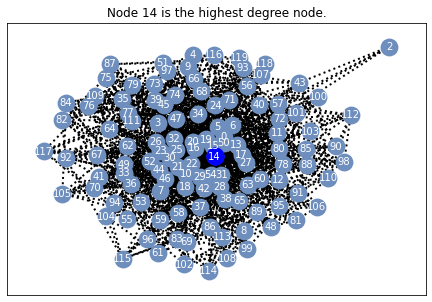

In [74]:
all_centr = dict(nx.degree_centrality(G))
keys_values = [key for key in all_centr.keys()]
obj_values = [all_centr[key] for key in keys_values]
highest_degr = keys_values[np.argmax(np.array(obj_values))]
fig3 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[highest_degr], node_color="b")
plt.title('Node ' + str(highest_degr) + ' is the highest degree node.')
fig3.savefig("Higest_Degree_node_" + str(n_row) + "_m" + str(m) + ".png")

### Finding the graphs density

In [75]:
print('Density of graph:', nx.density(G))

Density of graph: 0.18074348383421165


### Raduis and diameter of the graph

In [76]:
print('Diameter of the graph: ' + str(nx.diameter(G)) + ', Raduis of graph: ' + str(nx.radius(G, e=None)))

Diameter of the graph: 3, Raduis of graph: 2


### Eccentrity

In [77]:
# eccentrity of node 2 & 5
print(dict(nx.eccentricity(G, v=[2, 5])))

{2: 3, 5: 2}


### Betweenness centrality

In [78]:
print(nx.betweenness_centrality(G, k=None, normalized=True, weight=None, endpoints=False, seed=None))

{0: 0.04118622946663954, 2: 6.671257917519133e-05, 3: 0.005758113542660768, 4: 0.0018531004475741185, 5: 0.01807387210571099, 6: 0.012767883027089016, 7: 0.00946548399540483, 8: 0.0026167350812806925, 9: 0.001174247255058757, 10: 0.013207574391672966, 11: 0.006612187630707004, 12: 0.0029013332525130433, 13: 0.03733953040425541, 14: 0.04687258767938667, 15: 0.03603032480434347, 16: 0.022755007287691944, 17: 0.0337575594762964, 18: 0.01482456525719387, 19: 0.025677255908168096, 20: 0.015215509842922206, 21: 0.018280516319838937, 22: 0.05548441860674712, 23: 0.017835946233051684, 24: 0.009272784358521396, 25: 0.01714525569764927, 26: 0.017797399370751345, 27: 0.006396749217058723, 28: 0.00942239253697416, 29: 0.011817145853861188, 30: 0.00871006414229314, 31: 0.016928583151455918, 32: 0.01836717404508464, 33: 0.004463994383668247, 34: 0.009708989054770597, 35: 0.0024999184903293677, 36: 0.006321634023628393, 37: 0.004828954461275434, 38: 0.006072072961078626, 39: 0.0045117312673506925, 40

### Closeness centrality

In [79]:
print(nx.closeness_centrality(G, u=None, distance=None, wf_improved=True))

{0: 0.644808743169399, 2: 0.44029850746268656, 3: 0.5619047619047619, 4: 0.5339366515837104, 5: 0.5870646766169154, 6: 0.5812807881773399, 7: 0.5756097560975609, 8: 0.5315315315315315, 9: 0.5130434782608696, 10: 0.5784313725490197, 11: 0.5539906103286385, 12: 0.5412844036697247, 13: 0.644808743169399, 14: 0.6781609195402298, 15: 0.644808743169399, 16: 0.6210526315789474, 17: 0.6344086021505376, 18: 0.59, 19: 0.6082474226804123, 20: 0.59, 21: 0.5959595959595959, 22: 0.6629213483146067, 23: 0.59, 24: 0.5728155339805825, 25: 0.5959595959595959, 26: 0.5989847715736041, 27: 0.5645933014354066, 28: 0.5619047619047619, 29: 0.5784313725490197, 30: 0.5619047619047619, 31: 0.592964824120603, 32: 0.5812807881773399, 33: 0.5488372093023256, 34: 0.5700483091787439, 35: 0.5363636363636364, 36: 0.5539906103286385, 37: 0.5539906103286385, 38: 0.5539906103286385, 39: 0.5488372093023256, 40: 0.5363636363636364, 41: 0.543778801843318, 42: 0.5870646766169154, 43: 0.5363636363636364, 44: 0.5592417061611374

### Edgebetweenness

In [80]:
print(nx.edge_betweenness_centrality(G, k=None, normalized=True, weight=None, seed=None))

{(0, 2): 0.006509720156051702, (0, 3): 0.0012431988606915639, (0, 4): 0.0018933519812923284, (0, 5): 0.0012167283054197852, (0, 6): 0.0011167137360104478, (0, 7): 0.0011382479894797965, (0, 8): 0.00210238335407922, (0, 9): 0.0022076575746779186, (0, 10): 0.001314792660664998, (0, 11): 0.0014165787434515416, (0, 12): 0.001785563420280833, (0, 13): 0.0007907587586189627, (0, 14): 0.0010156256914440115, (0, 15): 0.0009430706895806166, (0, 16): 0.0010395371296242416, (0, 17): 0.0010609732003016552, (0, 18): 0.0011905567985219996, (0, 19): 0.0011776827942081335, (0, 20): 0.0013084957219445315, (0, 21): 0.0011436894916863234, (0, 22): 0.0013783539814133181, (0, 25): 0.0011787943533806285, (0, 26): 0.0012750940967414049, (0, 28): 0.001402867466619303, (0, 30): 0.0016344303741707533, (0, 35): 0.0018853776921045184, (0, 37): 0.001423002964899284, (0, 39): 0.0016746139174773395, (0, 42): 0.001844234219971756, (0, 43): 0.0016277437707023612, (0, 44): 0.001560511544337373, (0, 45): 0.0015782762319

### Transitivity

In [81]:
print(nx.transitivity(G))

0.27159789947486873


### Finding a node neighbors and non neighbors

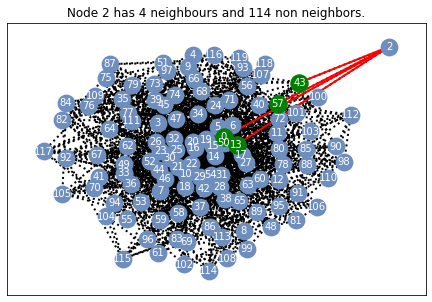

In [82]:
node_id = 2
#https://networkx.org/documentation/stable/reference/classes/generated/networkx.Graph.neighbors.html
dict_value = nx.all_neighbors(G, node_id)
list_value = [item for item in dict_value]
# Non neighbors
dict_value_non = nx.non_neighbors(G, node_id)
list_value_non = [item for item in dict_value_non]
# get the links
new_edges = []
for n in list_value:
    new_edges.append([n, node_id])
                      
if len(new_edges) > 0:
    fig4 = plt.figure(figsize=(7.5, 5))
    plt.clf()
    nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
    nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
    nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
    nx.draw_networkx_nodes(G,node_pos, nodelist=list_value, node_color="g")
    nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
    plt.title('Node ' + str(node_id) + ' has ' + str(len(list_value)) + ' neighbours and ' 
              + str(len(list_value_non)) + ' non neighbors.')
    fig4.savefig(str(node_id) + "_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Finding the common neighbors for two nodes

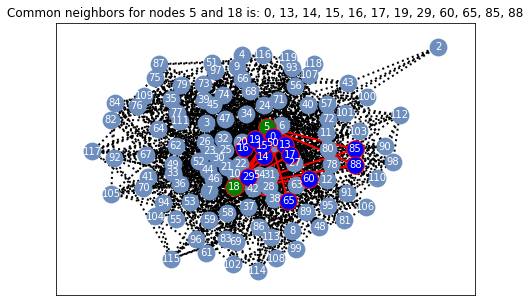

In [83]:
first_node = 5
second_node = 18

common = nx.common_neighbors(G, first_node, second_node)
common_list = [item for item in common]
# get the links
new_edges = []
for n in common_list:
    new_edges.append([first_node, n])
    new_edges.append([second_node, n])
    
fig7 = plt.figure(figsize=(7.5, 5))
plt.clf()
nx.draw_networkx_nodes(G, node_pos, node_color='#6E8EBD', node_size=250, linewidths=2.0)
nx.draw_networkx_labels(G, node_pos, font_size=10, font_color='w')
nx.draw_networkx_edges(G, node_pos, width=2.0, style='dotted')
nx.draw_networkx_nodes(G,node_pos, nodelist=[first_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=[second_node], edgecolors="r", node_color="g")
nx.draw_networkx_nodes(G,node_pos, nodelist=common_list, edgecolors="r", node_color="b")
nx.draw_networkx_edges(G, node_pos, edgelist = new_edges, width=2.0, edge_color='r')
if len(common_list) > 0:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + ', '.join(str(e) for e in common_list))
else:
    plt.title('Common neighbors for nodes ' + str(first_node) + ' and ' + str(second_node) + 
              ' is: ' + 'None')
fig7.savefig(str(first_node) + '_' + str(second_node) + "Common_Neighbours_n" + str(n_row) + "_m" + str(m) + ".png")

### Size of the network

In [84]:
# Get the number of nodes 
nodes = float(nx.number_of_nodes(G))
print('Total number of nodes on the graph:', nodes)

Total number of nodes on the graph: 119.0


### Network Nodes Characteristics

In [85]:
# Get the dictionary keys
dict_keys = list(degrees.keys())
# Get the dictionary objects
dict_objs = [degrees[key] for key in degrees.keys()]

new_array = np.array(dict_objs)
max_index = np.argmax(new_array)

print('Nodes and the number of edges made to an existing Node in the network:', '\n')
print('Node ID:','\n', dict_keys, '\n')
print('Number of Edges:','\n', dict_objs, '\n')
print('Node', dict_keys[max_index], 'has the higest number of connected edges of value',new_array[max_index])

Nodes and the number of edges made to an existing Node in the network: 

Node ID: 
 [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119] 

Number of Edges: 
 [54, 27, 4, 26, 16, 35, 33, 31, 16, 11, 32, 24, 18, 54, 63, 54, 47, 50, 37, 42, 37, 39, 58, 36, 31, 38, 39, 27, 28, 32, 27, 37, 34, 23, 29, 18, 23, 24, 24, 21, 17, 20, 36, 17, 25, 21, 23, 26, 17, 18, 28, 17, 25, 18, 31, 16, 18, 18, 21, 17, 20, 15, 18, 19, 19, 20, 15, 14, 17, 14, 16, 20, 17, 15, 19, 14, 15, 15, 15, 13, 17, 16, 15, 16, 13, 13, 15, 13, 15, 15, 15, 16, 13, 13, 14, 16, 12, 13, 13, 13, 15, 

### Adjacency matrix

In [86]:
# https://www.slideshare.net/rik0/complex-and-social-network-analysis-in-python/9-Average_geodesic_distance_i_n
# Get the matrix values
A = nx.to_numpy_matrix(G)
A

matrix([[0., 1., 1., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]])

### Average path length

In [87]:
average_shortest_path = nx.average_shortest_path_length(G)
print('Average length of shortest path:', average_shortest_path)

Average length of shortest path: 1.8498789346246973


### Clustering and Clustering Coefficient

In [88]:
print(nx.clustering(G))

{0: 0.251088534107402, 2: 0.5, 3: 0.35384615384615387, 4: 0.4666666666666667, 5: 0.2689075630252101, 6: 0.2765151515151515, 7: 0.34623655913978496, 8: 0.3333333333333333, 9: 0.36363636363636365, 10: 0.27419354838709675, 11: 0.3115942028985507, 12: 0.4117647058823529, 13: 0.2714078374455733, 14: 0.257006874669487, 15: 0.24528301886792453, 16: 0.30531400966183575, 17: 0.24897959183673468, 18: 0.2904761904761905, 19: 0.2346109175377468, 20: 0.2777777777777778, 21: 0.2716927453769559, 22: 0.19903206291591047, 23: 0.23174603174603176, 24: 0.30114942528735633, 25: 0.26884779516358465, 26: 0.26720647773279355, 27: 0.3247863247863248, 28: 0.2792022792022792, 29: 0.2782258064516129, 30: 0.2934472934472934, 31: 0.25825825825825827, 32: 0.2281639928698752, 33: 0.3593073593073593, 34: 0.2881773399014778, 35: 0.3790849673202614, 36: 0.2964426877470356, 37: 0.33992094861660077, 38: 0.286231884057971, 39: 0.2857142857142857, 40: 0.3416666666666667, 41: 0.2789473684210526, 42: 0.173109243697479, 43: 0

### List of Connected Nodes

In [89]:
a = list(nx.connected_components(G))
print('List of connected components:', '\n', a)

List of connected components: 
 [{0, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119}]


## Number of node neighbours in the network

In [90]:
print('Node positions:', '\n', node_pos)

Node positions: 
 {0: array([0.12309232, 0.1016193 ]), 1: array([0.32759842, 0.11648812]), 2: array([1.        , 0.71130788]), 3: array([-0.22690862,  0.19570443]), 4: array([-0.04046774,  0.65620412]), 5: array([0.09219902, 0.17072559]), 6: array([0.16854536, 0.18131728]), 7: array([-0.21303081, -0.25875172]), 8: array([ 0.22844268, -0.5276435 ]), 9: array([-0.06561758,  0.5761588 ]), 10: array([-0.07437925, -0.14236731]), 11: array([0.40654927, 0.13363697]), 12: array([ 0.41375696, -0.18565137]), 13: array([0.19082747, 0.05098571]), 14: array([ 0.07526385, -0.02741073]), 15: array([0.0686671 , 0.04330429]), 16: array([-0.0305188 ,  0.02845197]), 17: array([ 0.21733584, -0.01672351]), 18: array([-0.08090391, -0.23251069]), 19: array([0.03021876, 0.0878317 ]), 20: array([-0.03937552,  0.07030951]), 21: array([-0.12020112, -0.09738982]), 22: array([-0.0485854 , -0.07509105]), 23: array([-0.21211193,  0.00958793]), 24: array([0.07960366, 0.31631112]), 25: array([-0.12739449,  0.01811929]

### References

[1]https://networkx.org/

[2]https://www.tutorialspoint.com/python_data_science/python_matplotlib.htm

[3]https://www.geeksforgeeks.org/barabasi-albert-graph-scale-free-models/

[4]https://hal.archives-ouvertes.fr/hal-00940688/document

[5]https://stackoverflow.com/questions/64485434/how-to-plot-the-distribution-of-a-graphs-clustering-coefficient